Name: Zhining Zhou

Andrew ID: zhiningz

Collaborators (if none, say "none"; do *not* leave this blank): none

Reminder: you should not be sharing code.

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] The Distribution of Words in a Human Language: Zipf's Law [45 pts]

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

This problem assumes you have already installed the `spaCy` package ([https://spacy.io](https://spacy.io)). Instructions for installing this are part of the tutorial file "`Anaconda, Jupyter, and spaCy setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture.

Note: For this problem, you don't actually need `spaCy`'s named entity recognition, grammatical parsing, or part-of-speech tagging. Turning these elements off when you instantiate the nlp object can substantially speed up your code.  To make sure these are off when instantiating the nlp object, call: 

`
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
`


(a) [5 pts] Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project ([https://www.gutenberg.org/browse/scores/top](https://www.gutenberg.org/browse/scores/top)). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

Note: Please DO NOT change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will receive 0 points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [1]:
########################################################################
######################### Write your code here #########################
########################################################################
import glob
book_list = glob.glob('./HW1_Dataset/*.txt')

s = ""
for i in range(len(book_list)):
    s += open(book_list[i]).read()
len(s)

68809185

In [7]:
type(s)

str

(b) [15 pts] Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [13]:
########################################################################
######################### Write your code here #########################
########################################################################
import spacy
import re
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
parsed_text = nlp(s)

In [15]:
from collections import Counter

histogram_with_some_filtering = Counter()

for token in parsed_text:
    lemma = token.lemma_.lower()
    if re.match('[a-zA-Z]+$', lemma):
        histogram_with_some_filtering[lemma] += 1
    
from operator import itemgetter
sorted_lemma_count_pairs = sorted(histogram_with_some_filtering.items(),
                                  reverse=True,
                                  key=itemgetter(1))

In [16]:
j = 1
for i in range(len(sorted_lemma_count_pairs)):
    sorted_lemma_count_pairs[i] = sorted_lemma_count_pairs[i] + (j,)
    j += 1
sorted_lemma_count_pairs[0]

('the', 703039, 1)

In [17]:
for lemma, count, rank in sorted_lemma_count_pairs[0:50]:
    print(lemma, ":", count, "Rank", ":", rank)

the : 703039 Rank : 1
and : 436050 Rank : 2
be : 428776 Rank : 3
of : 386402 Rank : 4
a : 348722 Rank : 5
to : 324526 Rank : 6
in : 204342 Rank : 7
i : 188689 Rank : 8
have : 188175 Rank : 9
that : 170133 Rank : 10
he : 132594 Rank : 11
it : 132206 Rank : 12
not : 112562 Rank : 13
you : 108862 Rank : 14
his : 108574 Rank : 15
with : 101244 Rank : 16
for : 95436 Rank : 17
this : 76752 Rank : 18
but : 75889 Rank : 19
my : 74158 Rank : 20
her : 68453 Rank : 21
at : 65031 Rank : 22
on : 62908 Rank : 23
do : 62624 Rank : 24
by : 61992 Rank : 25
him : 59131 Rank : 26
which : 58932 Rank : 27
all : 58815 Rank : 28
say : 58546 Rank : 29
me : 58131 Rank : 30
they : 56663 Rank : 31
she : 52136 Rank : 32
from : 50107 Rank : 33
much : 49509 Rank : 34
so : 48117 Rank : 35
or : 47840 Rank : 36
will : 44667 Rank : 37
can : 42370 Rank : 38
we : 41808 Rank : 39
one : 41273 Rank : 40
man : 39882 Rank : 41
them : 39409 Rank : 42
no : 38577 Rank : 43
their : 38383 Rank : 44
what : 37922 Rank : 45
there : 3

(c) [10 pts] Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

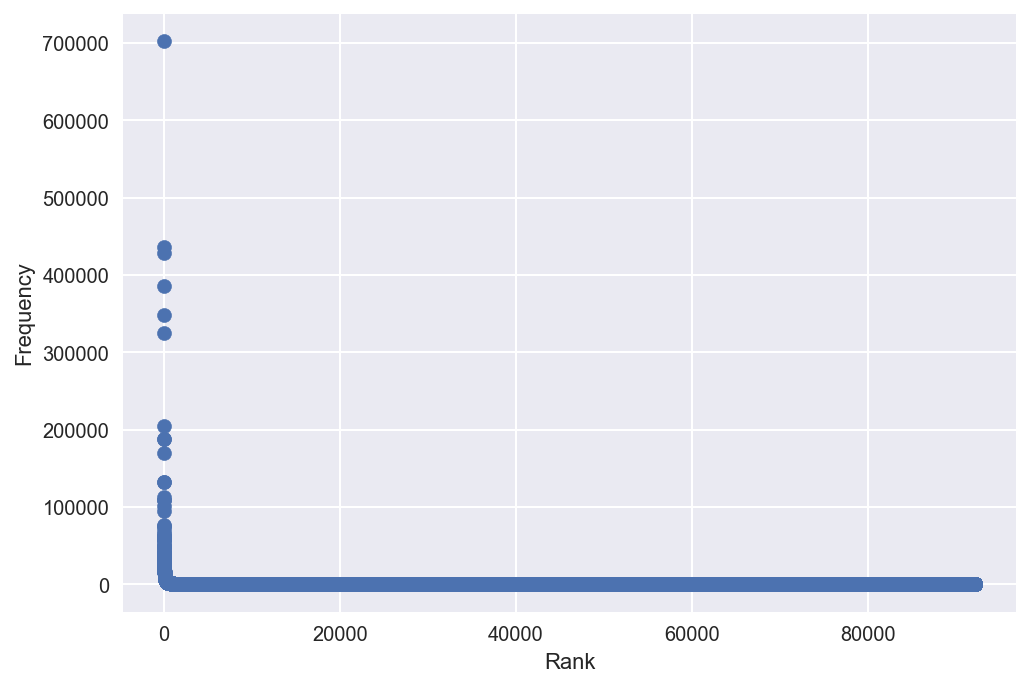

In [18]:
# Raw scatter plot
########################################################################
######################### Write your code here #########################
########################################################################
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

plt.xlabel('Rank')
plt.ylabel('Frequency')
x = []
y = []
for lemma, count, rank in sorted_lemma_count_pairs:
    x.append(rank)
    y.append(count)
plt.scatter(x, y);

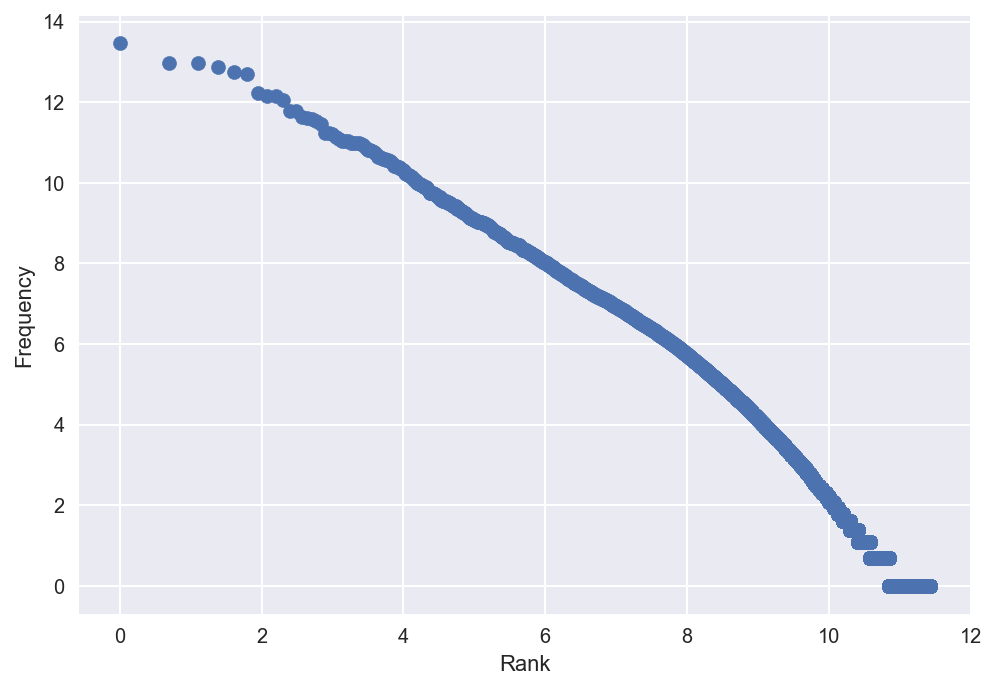

In [19]:
# Log-log plot
########################################################################
######################### Write your code here #########################
########################################################################
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display
import math

plt.xlabel('Rank')
plt.ylabel('Frequency')
x = []
y = []
for lemma, count, rank in sorted_lemma_count_pairs:
    x.append(math.log(rank))
    y.append(math.log(count))
plt.scatter(x, y)

(d) [15 pts] Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): *** From the log-log plot, I observe that the word with higher frequency will have lower rank. According to the power law: log(f(r)) = log(c) + (-1) * log(r),  there should be a linear relationship between log(f(r)) and log(r). The log-log plot is consistent with the power law.***

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [20]:
print('Probability of drawing one of the 4 most frequent words: ')
########################################################################
######################### Write your code here #########################
########################################################################
sum_of_words = 0
for i in range(len(sorted_lemma_count_pairs)):
    sum_of_words += sorted_lemma_count_pairs[i][1]
four_most_freq_words = 0
for i in range(4):
    four_most_freq_words += sorted_lemma_count_pairs[i][1]
prob_four_most_freq_words = four_most_freq_words / sum_of_words
print(prob_four_most_freq_words)

print('Probability of drawing one of the 50 most frequent words: ')
########################################################################
######################### Write your code here #########################
########################################################################
fifty_most_freq_words = 0
for i in range(50):
    fifty_most_freq_words += sorted_lemma_count_pairs[i][1]
prob_fifty_most_freq_words = fifty_most_freq_words / sum_of_words
print(prob_fifty_most_freq_words)

Probability of drawing one of the 4 most frequent words: 
0.16174911157740285
Probability of drawing one of the 50 most frequent words: 
0.4844336508722665


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [22]:
print("Occur only once: ")
########################################################################
######################### Write your code here #########################
########################################################################
words_occurred_once = 0
for i in range(len(sorted_lemma_count_pairs)):
    if (sorted_lemma_count_pairs[i][1] == 1):
        words_occurred_once += 1
prop_words_occurred_once = words_occurred_once / len(sorted_lemma_count_pairs)
print(prop_words_occurred_once)
print("Occur fewer than 10 times: ")
########################################################################
######################### Write your code here #########################
########################################################################
words_occurred_less_than_ten = 0
for i in range(len(sorted_lemma_count_pairs)):
    if (sorted_lemma_count_pairs[i][1] < 10):
        words_occurred_less_than_ten += 1
prop_words_occurred_less_than_ten = words_occurred_less_than_ten / len(sorted_lemma_count_pairs)
print(prop_words_occurred_less_than_ten)

Occur only once: 
0.44313955127579513
Occur fewer than 10 times: 
0.7710725788086795


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en', disable=['parser', 'tagger'])
`


(a) [15 pts] Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

Text(0, 0.5, 'Frequency')

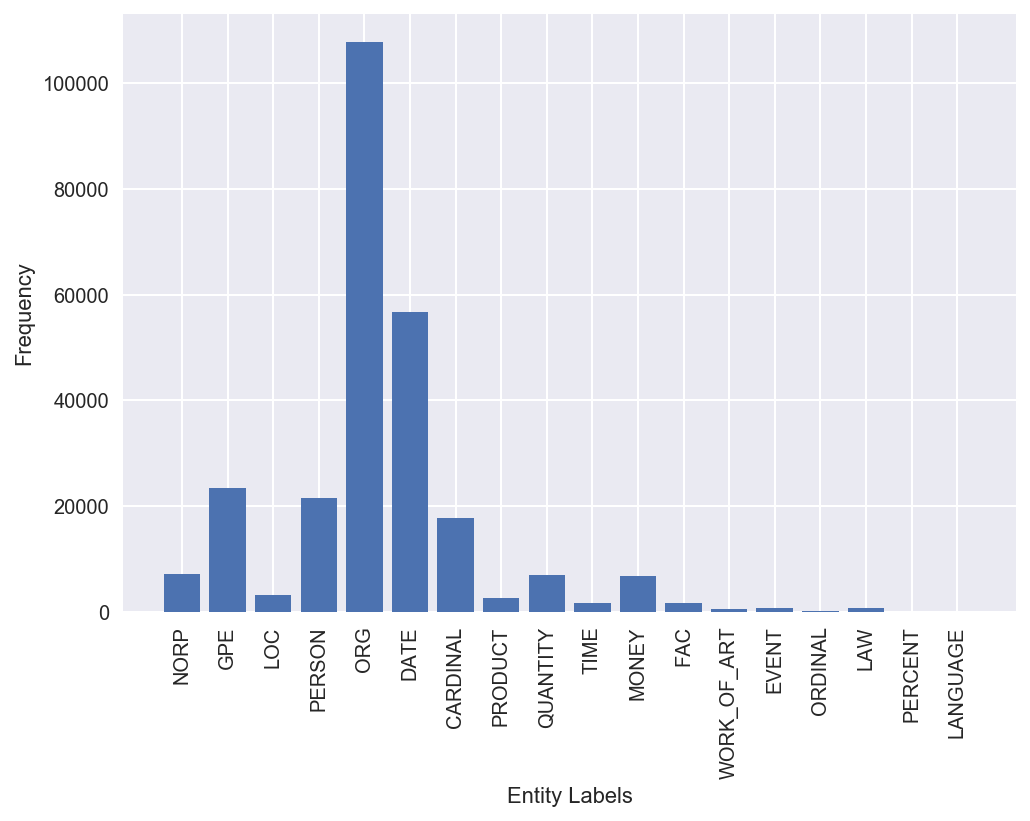

In [23]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()
########################################################################
######################### Write your code here #########################
########################################################################
for parsed_text in reuters_nlp:
    for entity_type in parsed_text:
        lemma = entity_type.lemma_.lower()
        if re.match('[a-zA-Z]+$', lemma):
            entity_label = entity_type.ent_type_
            if (entity_label != ''):
                label_counter[entity_label] += 1
        
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

plt.bar(range(len(label_counter)), list(label_counter.values()), align='center')
plt.xticks(range(len(label_counter)), list(label_counter.keys()), rotation = 90)
plt.xlabel('Entity Labels')
plt.ylabel('Frequency')

#### Note: I did not include entity with no labels in the histogram 

(b) [15 pts] Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

Hint: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering (as in Recitation 1) will be helpful here.

In [24]:
########################################################################
######################### Write your code here #########################
########################################################################
print("Top 10 most frequently occured entities with ORG")
entity_counter = Counter()
for parsed_text in reuters_nlp:
    entity_in_each_article = []
    for token in parsed_text:
        entity = token.lemma_.lower()
        if re.match('[a-zA-Z]+$', entity):
            label = token.ent_type_
            if ((entity not in entity_in_each_article) & (label == 'ORG')):
                entity_in_each_article.append(entity)
                entity_counter[entity] += 1

from operator import itemgetter
sorted_entities_count_pairs = sorted(entity_counter.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for entity, count in sorted_entities_count_pairs[0:10]:
    print(entity, ":", count)        

Top 10 most frequently occured entities with ORG
the : 3184
inc : 2770
corp : 2335
of : 1332
co : 1265
and : 1145
bank : 1035
have : 836
ltd : 821
international : 706


In [26]:
print("Top 10 most frequently occured entities with GPE")
entity_counter_GPE = Counter()
for parsed_text_GPE in reuters_nlp:
    entity_in_each_article_GPE = []
    for token in parsed_text_GPE:
        entity_GPE = token.lemma_.lower()
        label = token.ent_type_
        if re.match('[a-zA-Z]+$', entity_GPE):
            if ((entity_GPE not in entity_in_each_article_GPE) & (label == "GPE")):
                entity_in_each_article_GPE.append(entity_GPE)
                entity_counter_GPE[entity_GPE] += 1

from operator import itemgetter
sorted_entities_GPE_count_pairs = sorted(entity_counter_GPE.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for entity_GPE, count_GPE in sorted_entities_GPE_count_pairs[0:10]:
    print(entity_GPE, ":", count_GPE)        
    

Top 10 most frequently occured entities with GPE
shr : 745
japan : 588
the : 579
united : 435
new : 400
states : 397
west : 300
canada : 291
germany : 272
york : 262


(c) [20 pts] Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

#### I calculated the number of documents containing 'opec', and the number of documents containing the specific entity, as well as the number of documents that contains the specific entity and 'opec'. The relative ratio would be number of documents containing both entities / (number of documents containing 'opec') *  (number of documents containing the other entity)

In [27]:
########################################################################
######################### Write your code here #########################
########################################################################
for entity, count in sorted_entities_count_pairs:
    if (entity == "opec"):
        num_of_documents_opec = count
        break



entity_counter_opec = Counter()
for parsed_text_GPE in reuters_nlp:
    entity_in_each_article_GPE = []
    contain_opec = False
    for token in parsed_text_GPE:
        entity_GPE = token.lemma_.lower()
        if (entity_GPE == "opec"):
            contain_opec = True
        label = token.ent_type_
        if ((entity_GPE not in entity_in_each_article_GPE) & (label == "GPE")):
            entity_in_each_article_GPE.append(entity_GPE)
    if (contain_opec):
        for entity in entity_in_each_article_GPE:
            entity_counter_opec[entity] += 1   
    
print("Top 50 GPE entities that have the highest PMI with 'opec':")
PMI = Counter()
for entity, count in sorted_entities_GPE_count_pairs:
    if (entity not in entity_counter_opec.keys()):
        PMI[entity] = 0
    else:
        PMI[entity] = entity_counter_opec[entity] / count

from operator import itemgetter
sorted_entities_opec_count_pairs = sorted(PMI.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for entity, count in sorted_entities_opec_count_pairs[0:50]:
    print(entity) 

Top 50 GPE entities that have the highest PMI with 'opec':
balao
visnews
yanbu
reventador
tripoli
lichtblau
duri
assessing
bethesda
gabon
on
easter
pgrt
cera
neutral
zone
salado
aguarico
ecaudor
nazir
doha
discussion
vienna
riyadh
quota
quito
dubai
petronas
qatar
caracas
libya
uae
brent
sulphur
petromin
statfjord
charles
jerome
ecuador
nigeria
saudi
arabia
kuwait
venezuela
arab
emirates
jakarta
barber
conable
minas


Your text answer (for this question, your answer is *not* code): *** Some of the entities having high PMI values did not seem to have correlation with 'opec'. It could be that during the entity labeling process, some entities are not labeled correctly. For example, visnews is not a country, state, or city. It is a London-based news agency. Therefore, it may appear with 'opec' at the same time just because the news article mentions 'opec' in its content. There's other possible reasons for why the entities seem to have high PMI values. ***

### [Problem 3] Questionnaire [5 pts]
Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://goo.gl/forms/tGmCD8L9uI8zNbRG3